In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ライブラリのインポート

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

# データの読み込み

In [5]:
train = pd.read_csv('/content/drive/MyDrive/pm/data/input/train.csv')
test = pd.read_csv('/content/drive/MyDrive/pm/data/input/test.csv')

In [31]:
train

,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,...,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid
0,1,2019,1,1,Australia,Brisbane,-27.46794,153.02809,38,0.749,...,0.241,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424,19.901
1,2,2019,1,1,Australia,Darwin,-12.46113,130.84185,47,2.594,...,0.828,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021,13.741
2,3,2019,1,1,Australia,Melbourne,-37.81400,144.96332,17,1.190,...,0.000,2.107,8.089,15.719,22,10.309,13.133,15.422,6.355,25.918
3,4,2019,1,1,Australia,Newcastle,-32.92953,151.78010,63,4.586,...,0.284,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417,174.370
4,5,2019,1,1,Australia,Perth,-31.95224,115.86140,47,4.689,...,0.500,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109,167.063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195936,195937,2021,12,31,United States,Jacksonville,30.33218,-81.65565,12,0.694,...,2.195,2.710,6.125,3.757,12,16.774,22.679,26.058,13.252,16.150
195937,195938,2021,12,31,United States,Las Vegas,36.17497,-115.13722,14,0.528,...,1.002,2.974,6.861,8.354,12,10.432,14.741,15.827,7.078,16.895
195938,195939,2021,12,31,United States,Milwaukee,43.03890,-87.90647,171,1.975,...,0.994,1.087,2.578,0.612,26,2.049,3.531,6.686,5.286,86.299
195939,195940,2021,12,31,Vietnam,Hanoi,21.02450,105.84117,31,2.613,...,1.005,3.058,6.005,6.085,51,1.922,7.443,7.716,4.642,36.523


In [7]:
print(train['City'].unique())
print('都市の数：', len(train['City'].unique()))

['Brisbane' 'Darwin' 'Melbourne' 'Newcastle' 'Perth' 'Wollongong'
 'Antwerpen' 'Charleroi' 'Liège' 'São Paulo' 'Vitória' 'Vancouver'
 'Calama' 'Quilpué' 'Talca' 'Beijing' 'Changsha' 'Chengdu' 'Foshan'
 'Fushun' 'Fuzhou' 'Guangzhou' 'Guiyang' 'Haikou' 'Hangzhou' 'Harbin'
 'Hefei' 'Hegang' 'Jieyang' 'Jinan' 'Kunming' 'Lhasa' 'Nanchang' 'Nanjing'
 'Nanning' 'Ningbo' 'Qingdao' 'Qinhuangdao' 'Qiqihar' 'Shantou' 'Shenzhen'
 'Suzhou' 'Taiyuan' 'Xiamen' 'Xining' 'Xinxiang' 'Xi’an' 'Yinchuan'
 'Yunfu' 'Zhengzhou' 'Zhuzhou' 'Ürümqi' 'Marseille' 'Nancy' 'Nantes'
 'Strasbourg' 'Berlin' 'Hamburg' 'Budapest' 'Győr' 'Miskolc' 'Pécs'
 'Szeged' 'Bengaluru' 'Bhopal' 'Chandigarh' 'Delhi' 'Gandhinagar'
 'Hyderabad' 'Hāpur' 'Jaipur' 'Kolkata' 'Mumbai' 'Muzaffarnagar'
 'Thiruvananthapuram' 'Thrissur' 'Visakhapatnam' 'Yazd' 'Netanya'
 'Tel Aviv' 'Brescia' 'Livorno' 'Milan' 'Naples' 'Rome' 'Akita' 'Chiba'
 'Fukuoka' 'Gifu-shi' 'Hiroshima' 'Kagoshima' 'Kanazawa' 'Kobe' 'Kochi'
 'Kyoto' 'Miyazaki' 'Nagasaki' 'N

# 時系列の可視化

## Kyotoのデータを抽出し、pm25_midを可視化

In [8]:
kyoto_df = train.query('City == "Kyoto"')
kyoto_df

,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,...,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid
94,95,2019,1,1,Japan,Kyoto,35.02107,135.75385,15,5.781,...,0.334,2.416,2.674,1.287,34,-18.087,8.550,8.695,14.681,169.521
286,287,2019,1,2,Japan,Kyoto,35.02107,135.75385,320,1.788,...,0.312,3.001,3.356,2.254,411,19.560,20.992,22.681,2.207,33.050
483,484,2019,1,3,Japan,Kyoto,35.02107,135.75385,174,4.565,...,0.501,1.476,2.694,1.170,141,10.258,12.379,22.412,11.920,107.932
678,679,2019,1,4,Japan,Kyoto,35.02107,135.75385,47,0.100,...,1.132,1.717,6.809,7.619,19,13.843,24.453,26.629,6.247,16.871
871,872,2019,1,5,Japan,Kyoto,35.02107,135.75385,55,0.770,...,0.143,0.165,1.592,0.510,15,13.998,19.701,22.621,1.872,62.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195209,195210,2021,12,27,Japan,Kyoto,35.02107,135.75385,155,0.101,...,0.493,2.423,9.337,17.686,481,-6.811,-4.738,-1.352,7.206,17.298
195380,195381,2021,12,28,Japan,Kyoto,35.02107,135.75385,61,4.458,...,0.994,1.857,9.022,14.751,178,-1.917,-0.399,0.021,0.914,52.983
195545,195546,2021,12,29,Japan,Kyoto,35.02107,135.75385,279,2.341,...,0.101,1.004,5.443,5.666,448,-0.482,0.643,3.979,4.816,41.054
195702,195703,2021,12,30,Japan,Kyoto,35.02107,135.75385,222,1.229,...,0.526,3.654,9.153,17.898,463,-6.414,0.339,5.924,37.009,46.392


In [9]:
kyoto_df['datetime'] = pd.to_datetime({'year': kyoto_df['year'], 'month': kyoto_df['month'], 'day': kyoto_df['day']})
kyoto_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,...,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid,datetime
94,95,2019,1,1,Japan,Kyoto,35.02107,135.75385,15,5.781,...,2.416,2.674,1.287,34,-18.087,8.550,8.695,14.681,169.521,2019-01-01
286,287,2019,1,2,Japan,Kyoto,35.02107,135.75385,320,1.788,...,3.001,3.356,2.254,411,19.560,20.992,22.681,2.207,33.050,2019-01-02
483,484,2019,1,3,Japan,Kyoto,35.02107,135.75385,174,4.565,...,1.476,2.694,1.170,141,10.258,12.379,22.412,11.920,107.932,2019-01-03
678,679,2019,1,4,Japan,Kyoto,35.02107,135.75385,47,0.100,...,1.717,6.809,7.619,19,13.843,24.453,26.629,6.247,16.871,2019-01-04
871,872,2019,1,5,Japan,Kyoto,35.02107,135.75385,55,0.770,...,0.165,1.592,0.510,15,13.998,19.701,22.621,1.872,62.050,2019-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195209,195210,2021,12,27,Japan,Kyoto,35.02107,135.75385,155,0.101,...,2.423,9.337,17.686,481,-6.811,-4.738,-1.352,7.206,17.298,2021-12-27
195380,195381,2021,12,28,Japan,Kyoto,35.02107,135.75385,61,4.458,...,1.857,9.022,14.751,178,-1.917,-0.399,0.021,0.914,52.983,2021-12-28
195545,195546,2021,12,29,Japan,Kyoto,35.02107,135.75385,279,2.341,...,1.004,5.443,5.666,448,-0.482,0.643,3.979,4.816,41.054,2021-12-29
195702,195703,2021,12,30,Japan,Kyoto,35.02107,135.75385,222,1.229,...,3.654,9.153,17.898,463,-6.414,0.339,5.924,37.009,46.392,2021-12-30


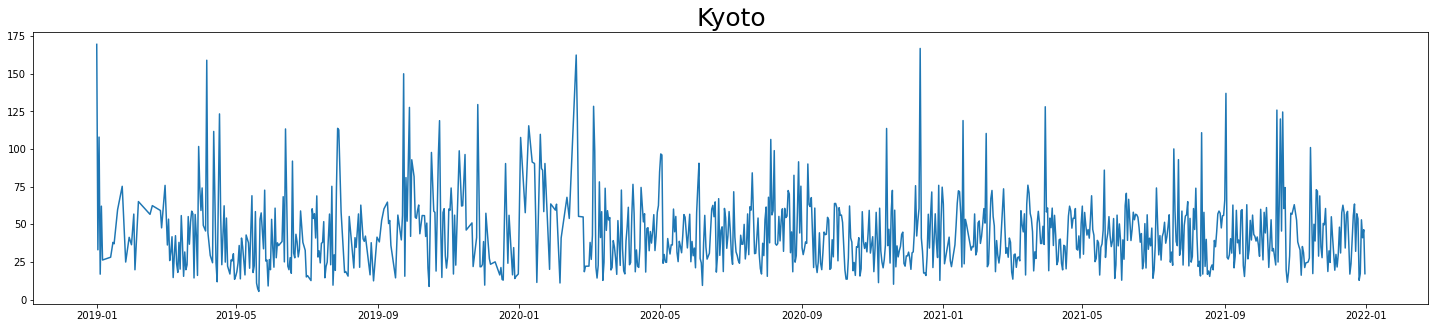

In [26]:
plt.figure(figsize=[25, 5])
plt.plot(kyoto_df['datetime'], kyoto_df['pm25_mid'])
plt.title('Kyoto', size=25)
plt.show()

## Kanazawaのデータを抽出し、pm25_midを可視化

In [11]:
kanazawa_df = train.query('City == "Kanazawa"')
kanazawa_df

,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,...,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid
91,92,2019,1,1,Japan,Kanazawa,36.6,136.61667,156,1.102,...,0.994,3.107,8.362,12.272,37,-1.288,4.991,13.668,30.818,6.902
283,284,2019,1,2,Japan,Kanazawa,36.6,136.61667,53,0.858,...,0.095,2.708,8.063,3.159,22,0.281,0.565,2.140,0.842,15.003
480,481,2019,1,3,Japan,Kanazawa,36.6,136.61667,135,0.090,...,0.136,2.091,6.950,2.392,14,0.897,2.739,4.286,2.595,25.924
675,676,2019,1,4,Japan,Kanazawa,36.6,136.61667,45,7.237,...,0.132,0.495,3.443,2.469,56,1.268,5.787,15.578,11.670,155.826
868,869,2019,1,5,Japan,Kanazawa,36.6,136.61667,43,4.519,...,0.411,0.678,4.903,3.154,17,-2.931,2.639,21.582,6.225,45.425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195206,195207,2021,12,27,Japan,Kanazawa,36.6,136.61667,39,0.530,...,2.245,2.726,3.679,0.501,19,14.841,18.010,26.321,5.143,50.928
195377,195378,2021,12,28,Japan,Kanazawa,36.6,136.61667,121,1.281,...,0.998,2.878,9.313,16.807,252,-4.863,-1.022,0.994,8.001,20.269
195542,195543,2021,12,29,Japan,Kanazawa,36.6,136.61667,174,2.574,...,0.804,4.547,9.378,17.871,237,-2.329,-0.989,3.121,7.224,25.271
195699,195700,2021,12,30,Japan,Kanazawa,36.6,136.61667,93,2.287,...,1.088,6.337,13.932,39.644,234,-0.515,1.955,4.178,5.302,20.809


In [12]:
kanazawa_df['datetime'] = pd.to_datetime({'year': kanazawa_df['year'], 'month': kanazawa_df['month'], 'day': kanazawa_df['day']})
kanazawa_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,...,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid,datetime
91,92,2019,1,1,Japan,Kanazawa,36.6,136.61667,156,1.102,...,3.107,8.362,12.272,37,-1.288,4.991,13.668,30.818,6.902,2019-01-01
283,284,2019,1,2,Japan,Kanazawa,36.6,136.61667,53,0.858,...,2.708,8.063,3.159,22,0.281,0.565,2.140,0.842,15.003,2019-01-02
480,481,2019,1,3,Japan,Kanazawa,36.6,136.61667,135,0.090,...,2.091,6.950,2.392,14,0.897,2.739,4.286,2.595,25.924,2019-01-03
675,676,2019,1,4,Japan,Kanazawa,36.6,136.61667,45,7.237,...,0.495,3.443,2.469,56,1.268,5.787,15.578,11.670,155.826,2019-01-04
868,869,2019,1,5,Japan,Kanazawa,36.6,136.61667,43,4.519,...,0.678,4.903,3.154,17,-2.931,2.639,21.582,6.225,45.425,2019-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195206,195207,2021,12,27,Japan,Kanazawa,36.6,136.61667,39,0.530,...,2.726,3.679,0.501,19,14.841,18.010,26.321,5.143,50.928,2021-12-27
195377,195378,2021,12,28,Japan,Kanazawa,36.6,136.61667,121,1.281,...,2.878,9.313,16.807,252,-4.863,-1.022,0.994,8.001,20.269,2021-12-28
195542,195543,2021,12,29,Japan,Kanazawa,36.6,136.61667,174,2.574,...,4.547,9.378,17.871,237,-2.329,-0.989,3.121,7.224,25.271,2021-12-29
195699,195700,2021,12,30,Japan,Kanazawa,36.6,136.61667,93,2.287,...,6.337,13.932,39.644,234,-0.515,1.955,4.178,5.302,20.809,2021-12-30


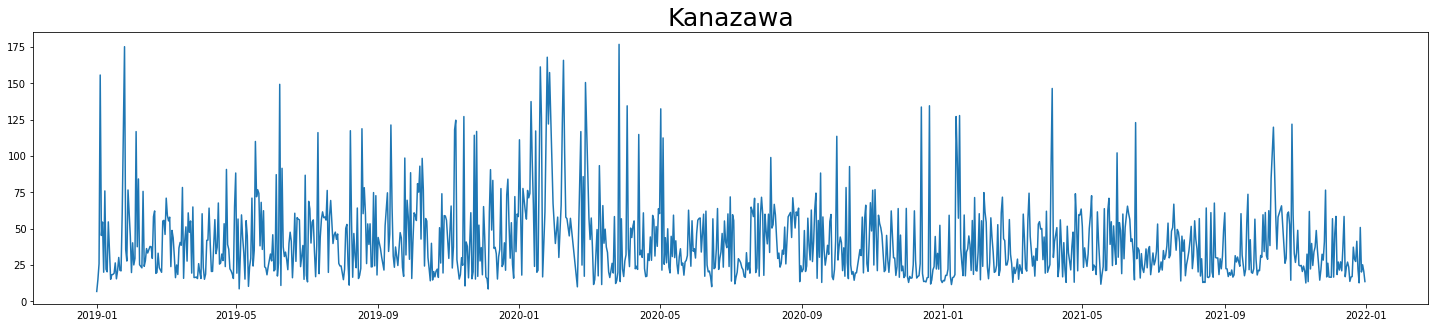

In [23]:
plt.figure(figsize=[25, 5])
plt.plot(kanazawa_df['datetime'], kanazawa_df['pm25_mid'])
plt.title('Kanazawa', size=25)
plt.show()

## Shanghaiのデータを抽出し、pm25_midを可視化

In [14]:
shanghai_df = train.query('City == "Shanghai"')
shanghai_df

,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,...,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid
228,229,2019,1,2,China,Shanghai,31.22222,121.45806,651,3.040,...,0.200,2.205,6.011,8.049,11,0.478,0.481,1.519,0.264,156.762
426,427,2019,1,3,China,Shanghai,31.22222,121.45806,52,0.059,...,0.414,0.502,2.938,1.510,66,8.012,8.352,14.366,3.428,116.905
622,623,2019,1,4,China,Shanghai,31.22222,121.45806,669,1.046,...,0.104,1.895,5.253,6.381,186,4.245,7.549,11.203,11.731,63.177
812,813,2019,1,5,China,Shanghai,31.22222,121.45806,746,2.865,...,0.105,2.087,5.705,7.430,109,6.758,7.015,8.967,1.147,85.798
1004,1005,2019,1,6,China,Shanghai,31.22222,121.45806,134,0.738,...,0.998,2.496,4.960,3.739,27,3.814,11.538,12.930,20.197,43.848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195159,195160,2021,12,27,China,Shanghai,31.22222,121.45806,880,1.248,...,0.100,2.467,5.174,6.247,631,-14.167,-13.610,-6.552,13.942,79.063
195323,195324,2021,12,28,China,Shanghai,31.22222,121.45806,782,4.940,...,0.187,0.964,3.342,2.388,835,-7.882,-5.508,0.000,14.816,129.448
195496,195497,2021,12,29,China,Shanghai,31.22222,121.45806,766,3.257,...,0.510,2.468,6.811,9.662,792,-7.044,-4.230,-1.065,8.574,154.774
195650,195651,2021,12,30,China,Shanghai,31.22222,121.45806,772,6.290,...,0.208,2.531,5.827,7.463,841,-12.008,-5.878,0.961,39.813,162.949


In [15]:
shanghai_df['datetime'] = pd.to_datetime({'year': shanghai_df['year'], 'month': shanghai_df['month'], 'day': shanghai_df['day']})
shanghai_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,...,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid,datetime
228,229,2019,1,2,China,Shanghai,31.22222,121.45806,651,3.040,...,2.205,6.011,8.049,11,0.478,0.481,1.519,0.264,156.762,2019-01-02
426,427,2019,1,3,China,Shanghai,31.22222,121.45806,52,0.059,...,0.502,2.938,1.510,66,8.012,8.352,14.366,3.428,116.905,2019-01-03
622,623,2019,1,4,China,Shanghai,31.22222,121.45806,669,1.046,...,1.895,5.253,6.381,186,4.245,7.549,11.203,11.731,63.177,2019-01-04
812,813,2019,1,5,China,Shanghai,31.22222,121.45806,746,2.865,...,2.087,5.705,7.430,109,6.758,7.015,8.967,1.147,85.798,2019-01-05
1004,1005,2019,1,6,China,Shanghai,31.22222,121.45806,134,0.738,...,2.496,4.960,3.739,27,3.814,11.538,12.930,20.197,43.848,2019-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195159,195160,2021,12,27,China,Shanghai,31.22222,121.45806,880,1.248,...,2.467,5.174,6.247,631,-14.167,-13.610,-6.552,13.942,79.063,2021-12-27
195323,195324,2021,12,28,China,Shanghai,31.22222,121.45806,782,4.940,...,0.964,3.342,2.388,835,-7.882,-5.508,0.000,14.816,129.448,2021-12-28
195496,195497,2021,12,29,China,Shanghai,31.22222,121.45806,766,3.257,...,2.468,6.811,9.662,792,-7.044,-4.230,-1.065,8.574,154.774,2021-12-29
195650,195651,2021,12,30,China,Shanghai,31.22222,121.45806,772,6.290,...,2.531,5.827,7.463,841,-12.008,-5.878,0.961,39.813,162.949,2021-12-30


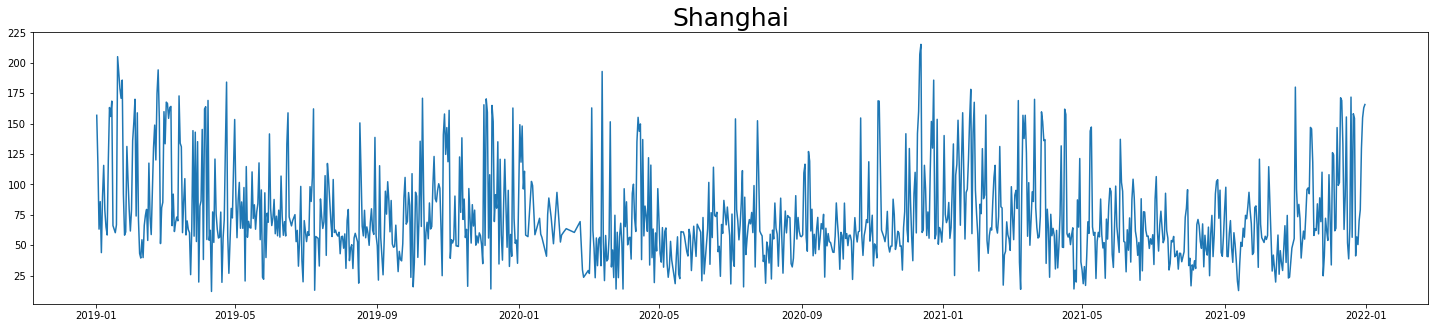

In [24]:
plt.figure(figsize=[25, 5])
plt.plot(shanghai_df['datetime'], shanghai_df['pm25_mid'])
plt.title('Shanghai', size=25)
plt.show()

## Beijingのデータを抽出し、pm25_midを可視化

In [29]:
beijing_df = train.query('City == "Beijing"')
beijing_df

,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,...,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid
15,16,2019,1,1,China,Beijing,39.9075,116.39723,199,5.209,...,0.498,1.493,2.375,0.856,181,0.529,4.228,11.085,15.346,153.471
203,204,2019,1,2,China,Beijing,39.9075,116.39723,10,0.142,...,1.230,2.731,3.578,1.288,10,-2.750,10.128,10.909,43.260,57.529
402,403,2019,1,3,China,Beijing,39.9075,116.39723,34,0.063,...,0.156,0.582,5.886,7.993,15,0.986,3.066,12.583,4.145,22.209
597,598,2019,1,4,China,Beijing,39.9075,116.39723,172,4.070,...,0.495,1.474,2.279,0.772,127,8.099,11.033,15.048,11.380,53.966
787,788,2019,1,5,China,Beijing,39.9075,116.39723,13,3.549,...,0.124,0.491,0.534,0.041,132,16.253,16.315,18.156,0.859,78.984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195136,195137,2021,12,27,China,Beijing,39.9075,116.39723,260,0.914,...,0.200,0.462,2.633,1.439,269,-23.066,-15.055,-12.646,25.960,78.788
195300,195301,2021,12,28,China,Beijing,39.9075,116.39723,171,3.608,...,0.382,0.497,3.141,1.827,112,-1.635,2.478,3.018,5.232,169.965
195476,195477,2021,12,29,China,Beijing,39.9075,116.39723,186,0.975,...,0.477,6.596,9.259,18.745,278,-24.049,-18.793,-13.635,25.777,36.529
195630,195631,2021,12,30,China,Beijing,39.9075,116.39723,253,0.926,...,0.209,1.507,6.444,9.384,274,-19.966,-16.809,-11.605,16.840,40.603


In [18]:
beijing_df['datetime'] = pd.to_datetime({'year': beijing_df['year'], 'month': beijing_df['month'], 'day': beijing_df['day']})
beijing_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,...,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid,datetime
15,16,2019,1,1,China,Beijing,39.9075,116.39723,199,5.209,...,1.493,2.375,0.856,181,0.529,4.228,11.085,15.346,153.471,2019-01-01
203,204,2019,1,2,China,Beijing,39.9075,116.39723,10,0.142,...,2.731,3.578,1.288,10,-2.750,10.128,10.909,43.260,57.529,2019-01-02
402,403,2019,1,3,China,Beijing,39.9075,116.39723,34,0.063,...,0.582,5.886,7.993,15,0.986,3.066,12.583,4.145,22.209,2019-01-03
597,598,2019,1,4,China,Beijing,39.9075,116.39723,172,4.070,...,1.474,2.279,0.772,127,8.099,11.033,15.048,11.380,53.966,2019-01-04
787,788,2019,1,5,China,Beijing,39.9075,116.39723,13,3.549,...,0.491,0.534,0.041,132,16.253,16.315,18.156,0.859,78.984,2019-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195136,195137,2021,12,27,China,Beijing,39.9075,116.39723,260,0.914,...,0.462,2.633,1.439,269,-23.066,-15.055,-12.646,25.960,78.788,2021-12-27
195300,195301,2021,12,28,China,Beijing,39.9075,116.39723,171,3.608,...,0.497,3.141,1.827,112,-1.635,2.478,3.018,5.232,169.965,2021-12-28
195476,195477,2021,12,29,China,Beijing,39.9075,116.39723,186,0.975,...,6.596,9.259,18.745,278,-24.049,-18.793,-13.635,25.777,36.529,2021-12-29
195630,195631,2021,12,30,China,Beijing,39.9075,116.39723,253,0.926,...,1.507,6.444,9.384,274,-19.966,-16.809,-11.605,16.840,40.603,2021-12-30


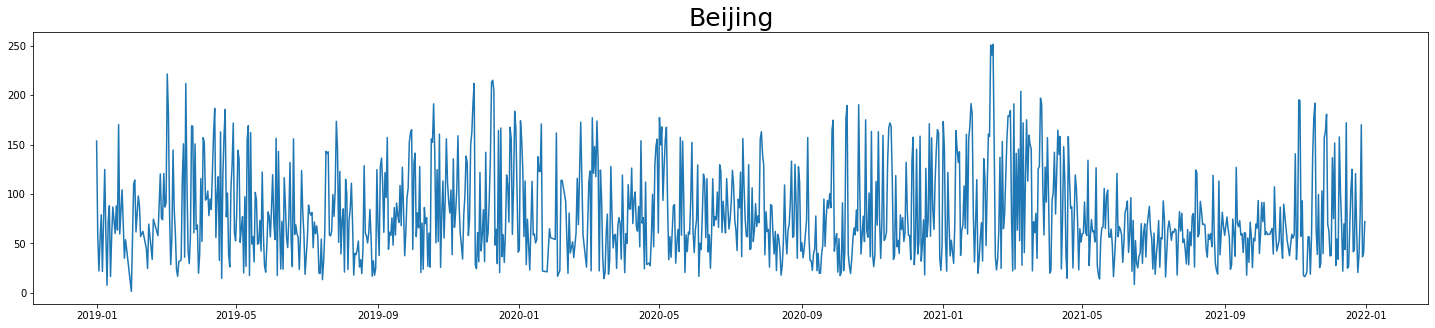

In [25]:
plt.figure(figsize=[25, 5])
plt.plot(beijing_df['datetime'], beijing_df['pm25_mid'])
plt.title('Beijing', size=25)
plt.show()